# Making modfiles compatible with ACT

ACT supports activation functions specified in the Boltzmann ($V_{1/2}$, $k$) format and provides tools for conversion from other specifications. In this example we demonstrate how to convert Allen Cell Types Database modfiles from the alpha-beta specification to the Boltzmann specification.

In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

from act.modfiles import vtrap, fit_boltzmann

## General algorithm

1. Transfer the activation function from the modfile and express it as a `Python` function.
2. Define a suitable voltage range. Use the `fit_boltzmann()` function from `act.modfiles` to fit a sigmoid and obtain $V_{1/2}$ and $k$.
3. Replace the activation function in the modfile with
$$
1.0 / \left(1.0 + \exp(-(v- V_{1/2})/k)\right).
$$

## Examples

In [50]:
# For convenience
def boltzmann(v, vhalf, k):
    return 1.0 / (1.0 + np.exp(-(v - vhalf) / k))

### NaTa

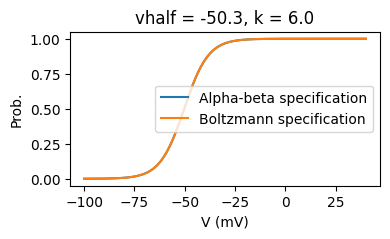

In [54]:
# Copied from the modfile
def NaTa(v):
    malphaF = 0.182
    mbetaF = 0.124
    mvhalf = -48
    mk = 6
    mAlpha = malphaF * vtrap(-(v - mvhalf), mk)
    mBeta = mbetaF * vtrap((v - mvhalf), mk)
    mInf = mAlpha / (mAlpha + mBeta)
    return mInf

# Fit Boltzmann
v = np.linspace(-100, 40, 1000)
vhalf, k = fit_boltzmann(v, NaTa(v))

# Plot to check
plt.figure(figsize = (4, 2))
plt.plot(v, NaTa(v), label = "Alpha-beta specification")
plt.plot(v, boltzmann(v, vhalf, k), label = "Boltzmann specification")
plt.xlabel("V (mV)")
plt.ylabel("Prob.")
plt.title(f"vhalf = {round(vhalf, 2)}, k = {round(k, 2)}")
plt.legend()

Update the modfile:

![](convert_allen_1.png)

### Ca_HVA

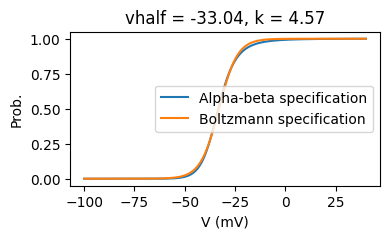

In [62]:
# Copied from the modfile
def Ca_HVA(v):
    mAlpha = 0.055 * vtrap(-27 - v, 3.8)        
    mBeta  =  (0.94*np.exp((-75-v)/17))
    mInf = mAlpha/(mAlpha + mBeta)
    return mInf

# Fit Boltzmann
v = np.linspace(-100, 40, 1000)
vhalf, k = fit_boltzmann(v, Ca_HVA(v))

# Plot to check
plt.figure(figsize = (4, 2))
plt.plot(v, Ca_HVA(v), label = "Alpha-beta specification")
plt.plot(v, boltzmann(v, vhalf, k), label = "Boltzmann specification")
plt.xlabel("V (mV)")
plt.ylabel("Prob.")
plt.title(f"vhalf = {round(vhalf, 2)}, k = {round(k, 2)}")
plt.legend()

Update the modfile...

### Ih

Note the reverse shape of the Ih activation function.

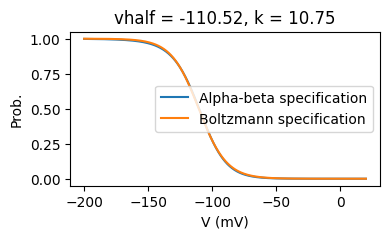

In [ ]:
# Copied from the modfile
def Ih(v):
    mAlpha = 0.001 * 6.43 * vtrap(v + 154.9, 11.9)
    mBeta  =  0.001*193*np.exp(v/33.1)
    mInf = mAlpha/(mAlpha + mBeta)
    return mInf

# Fit Boltzmann
v = np.linspace(-200, 20, 1000)
vhalf, k = fit_boltzmann(v, 1 - Ih(v)) # Note 1 - ...!

# Plot to check
plt.figure(figsize = (4, 2))
plt.plot(v, Ih(v), label = "Alpha-beta specification")
plt.plot(v, 1 - boltzmann(v, vhalf, k), label = "Boltzmann specification")
plt.xlabel("V (mV)")
plt.ylabel("Prob.")
plt.title(f"vhalf = {round(vhalf, 2)}, k = {round(k, 2)}")
plt.legend()

Update the modfile...

### Im_v2

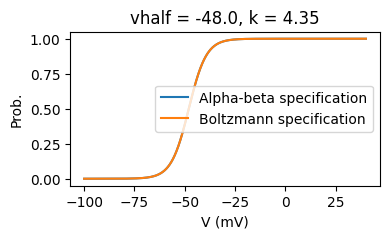

In [59]:
# Copied from the modfile
def Im_v2(v):
    mAlpha = 0.007 * np.exp( (6 * 0.4 * (v - (-48))) / 26.12 )
    mBeta = 0.007 * np.exp( (-6 * (1 - 0.4) * (v - (-48))) / 26.12 )
    mInf = mAlpha / (mAlpha + mBeta)
    return mInf

# Fit Boltzmann
v = np.linspace(-100, 40, 1000)
vhalf, k = fit_boltzmann(v, Im_v2(v))

# Plot to check
plt.figure(figsize = (4, 2))
plt.plot(v, Im_v2(v), label = "Alpha-beta specification")
plt.plot(v, boltzmann(v, vhalf, k), label = "Boltzmann specification")
plt.xlabel("V (mV)")
plt.ylabel("Prob.")
plt.title(f"vhalf = {round(vhalf, 2)}, k = {round(k, 2)}")
plt.legend()

Update the modfile...

### Kv2like

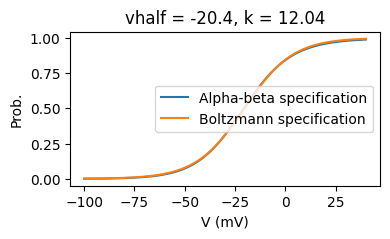

In [61]:
# Copied from the modfile
def Kv2like(v):
    mAlpha = 0.12 * vtrap( -(v - 43), 11.0)
    mBeta = 0.02 * np.exp(-(v + 1.27) / 120)
    mInf = mAlpha / (mAlpha + mBeta)
    return mInf

# Fit Boltzmann
v = np.linspace(-100, 40, 1000)
vhalf, k = fit_boltzmann(v, Kv2like(v))

# Plot to check
plt.figure(figsize = (4, 2))
plt.plot(v, Kv2like(v), label = "Alpha-beta specification")
plt.plot(v, boltzmann(v, vhalf, k), label = "Boltzmann specification")
plt.xlabel("V (mV)")
plt.ylabel("Prob.")
plt.title(f"vhalf = {round(vhalf, 2)}, k = {round(k, 2)}")
plt.legend()

Update the modfile...